
# Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

crime_df = pd.read_csv('../Resources/Los_Angeles/la_clean_data.csv')
crime_df.head()

,AreaName,CrimeCodeDescription,VictimAge
0,Harbor,ABORTION/ILLEGAL,26
1,Van Nuys,ABORTION/ILLEGAL,28
2,Central,ARSON,64
3,Central,ARSON,61
4,Central,ARSON,56


In [3]:
crime_df.count()

AreaName                163222
CrimeCodeDescription    163222
VictimAge               163222
dtype: int64

In [4]:
crime_df.dtypes

AreaName                object
CrimeCodeDescription    object
VictimAge                int64
dtype: object

In [5]:
X = crime_df[["AreaName", "CrimeCodeDescription"]]
y = crime_df["VictimAge"].values.reshape(-1, 1)
print(X.shape, y.shape)

(163222, 2) (163222, 1)


# Working with Categorical Data - Dummy Encoding (Binary Encoded Data)

In [6]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["AreaName","CrimeCodeDescription"])
data_binary_encoded.head()

,AreaName_77th Street,AreaName_Central,AreaName_Harbor,AreaName_Hollenbeck,AreaName_Hollywood,AreaName_Mission,AreaName_N Hollywood,AreaName_Newton,AreaName_Northeast,AreaName_Olympic,...,CrimeCodeDescription_UNAUTHORIZED COMPUTER ACCESS,"CrimeCodeDescription_VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)","CrimeCodeDescription_VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",CrimeCodeDescription_VANDALISM - MISDEAMEANOR ($399 OR UNDER),CrimeCodeDescription_VEHICLE - ATTEMPT STOLEN,CrimeCodeDescription_VEHICLE - STOLEN,CrimeCodeDescription_VIOLATION OF COURT ORDER,CrimeCodeDescription_VIOLATION OF RESTRAINING ORDER,CrimeCodeDescription_VIOLATION OF TEMPORARY RESTRAINING ORDER,CrimeCodeDescription_WEAPONS POSSESSION/BOMBING
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Scaling and Normalization
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,AreaName_77th Street,AreaName_Central,AreaName_Harbor,AreaName_Hollenbeck,AreaName_Hollywood,AreaName_Mission,AreaName_N Hollywood,AreaName_Newton,AreaName_Northeast,AreaName_Olympic,...,CrimeCodeDescription_UNAUTHORIZED COMPUTER ACCESS,"CrimeCodeDescription_VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)","CrimeCodeDescription_VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",CrimeCodeDescription_VANDALISM - MISDEAMEANOR ($399 OR UNDER),CrimeCodeDescription_VEHICLE - ATTEMPT STOLEN,CrimeCodeDescription_VEHICLE - STOLEN,CrimeCodeDescription_VIOLATION OF COURT ORDER,CrimeCodeDescription_VIOLATION OF RESTRAINING ORDER,CrimeCodeDescription_VIOLATION OF TEMPORARY RESTRAINING ORDER,CrimeCodeDescription_WEAPONS POSSESSION/BOMBING
141852,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
457,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36682,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151870,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
134113,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

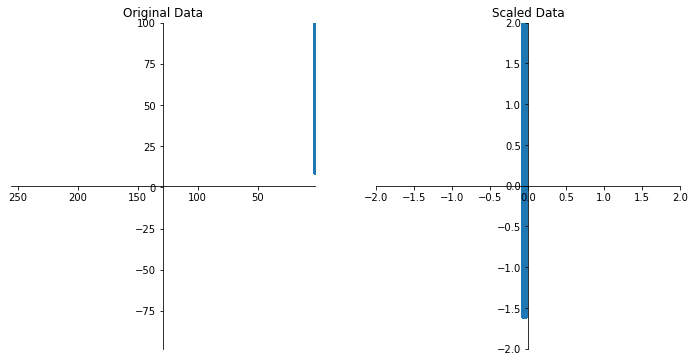

In [11]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["AreaName_Southwest"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["AreaName_Southwest"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [12]:
plt.show()

In [13]:
# Step 1) Convert Categorical data to numbers using Integer or Binary Encoding
X = pd.get_dummies(crime_df["AreaName"])
y = crime_df["VictimAge"].values.reshape(-1, 1)


In [14]:
# Step 2) Split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

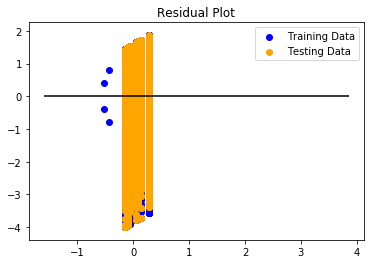

In [16]:
# Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [17]:
# Step 5) Quantify your model using the scaled data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(MSE)
print(r2)


0.9926141074042175
0.013916831592756806
